In [2]:
import os
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt
from gazeheatplot import gaussian
from GazeStimuliImage import re_generate_stimuli as regesti
from preattentive_object import PreattentiveObject as preobj
from PersonalTraitGaze import *

In [3]:
stimuli_list = ['shape','size','hue','brightness','orientation']
bg = np.zeros((1080,1920))
array_dict = {'shape':bg.copy(), 'size':bg.copy(), 'hue':bg.copy(), 'brightness':bg.copy(), 'orientation':bg.copy()}
participant_dict = {'chungha': '8', 'dongik': '7', 'eunhye': '1', 'In-Taek': '5', 'jooyeong': '13', 'juchanseo': '3', 'junryeol': '11', 
                    'juyeon': '4', 'myounghun': '9', 'songmin': '10', 'sooyeon': '6', 'woojinkang': '2', 'yeogyeong': '12'}
inv_participant = {v:k for k,v in participant_dict.items()}

In [ ]:
avaliable_location = [[] for i in range(77)]
for task, datapath in enumerate(['data/blue_rawdata_task1.csv', 'data/blue_rawdata_task2.csv']):
    myraw = LoadBlueRawData(datapath)
    participants_heatmaps = np.zeros((1080,1920,13))
    participants_imagemaps = np.zeros((1080,1920,13))
    data_indexlist = myraw.get_indexlist()
    for i in tqdm(data_indexlist):
        gaze_list = myraw.take_gaze(i)
        participant = myraw.take_participant(i)
        meta = myraw.take_meta(i)
        set_size_num = meta['set_size']-4
        target_num = myraw.take_targetnum(i)
        if set_size_num == 0:
            avaliable_location_num = target_num
        elif set_size_num == 1:
            avaliable_location_num = 16+target_num
        elif set_size_num == 2:
            avaliable_location_num = 41+target_num
        avaliable_location[avaliable_location_num].append(i)

    with open(os.path.join('feature_analysis', 'location', f'location_task{task+1}.txt'), 'w') as p:
        for line in avaliable_location:
            for element in line:
                p.write(f"{element}\t")
            p.write("\n")

In [ ]:
for task, datapath in enumerate(['data/blue_rawdata_task1.csv', 'data/blue_rawdata_task2.csv']):
    myraw = LoadBlueRawData(datapath)
    participants_heatmaps = np.zeros((1080,1920,13))
    participants_imagemaps = np.zeros((1080,1920,13))
    with open(f'feature_analysis/location/location_task{task+1}.txt', 'r') as p:
        available_location_list = p.read()
    available_location_list = available_location_list.split("\n")[:-1]
    for index_location, available_location in enumerate(available_location_list):
        avlo_index_list = available_location.split("\t")[:-1]
        for i in tqdm(avlo_index_list):
            i = int(i)
            gaze_list = myraw.take_gaze(i)
            participant = myraw.take_participant(i)
            meta = myraw.take_meta(i)
            stimuli = meta['task']
            participants_heatmaps[:,:,participant-1] = draw_heatmap(gaze_list,participants_heatmaps[:,:,participant-1])
            participants_imagemaps[:,:,participant-1] = draw_imagemap(myraw.stimuli(i),participants_imagemaps[:,:,participant-1])
        if index_location>=41:
            set_size = 6
            target_num = index_location-41
        elif 16<=index_location<41:
            set_size = 5
            target_num = index_location-16
        else:
            set_size = 4
            target_num = index_location
        np.save(f'feature_analysis/location/location_task{task+1}_ss{set_size}_targetnum{target_num}_heatmap',participants_heatmaps)
        np.save(f'feature_analysis/location/location_task{task+1}_ss{set_size}_targetnum{target_num}_imagemap',participants_imagemaps)

In [ ]:
# For Case of task 1 - set size 4 - target number 0 - level 1 (difficulty 4 (1-2, 2-3, 3-4, 4-5))
stimuli_list = ['shape','size','hue','brightness','orientation']
empty_maps = np.zeros((1080,1920,13))
heatmap_dict = {'shape':empty_maps.copy(), 'size':empty_maps.copy(), 'hue':empty_maps.copy(), 'brightness':empty_maps.copy(), 'orientation':empty_maps.copy()}
imagemap_dict = {'shape':empty_maps.copy(), 'size':empty_maps.copy(), 'hue':empty_maps.copy(), 'brightness':empty_maps.copy(), 'orientation':empty_maps.copy()}
datapath = 'data/blue_rawdata_task1.csv'
task = 0
location_index = 0
myraw = LoadBlueRawData(datapath)
with open(f'feature_analysis/location/location_task{task+1}.txt', 'r') as p:
    available_location_list = p.read()
available_location_list = available_location_list.split("\n")[:-1]
my_available_location = available_location_list[location_index]
avlo_index_list = my_available_location.split("\t")[:-1]
for i in tqdm(avlo_index_list):
    i = int(i)
    gaze_list = myraw.take_gaze(i)
    participant = myraw.take_participant(i)
    meta = myraw.take_meta(i)
    stimuli = meta['task']
    level = myraw.take_specific(i, 'level')[0]
    level = level[len(level)-3:]
    target, distractor = level.split('-')
    difficulty = abs(int(target)-int(distractor))
    target_num = myraw.take_targetnum(i)
    print(target_num)

    if difficulty == 1:
        heatmap_dict[stimuli][:,:,participant-1] = draw_heatmap(gaze_list,heatmap_dict[stimuli][:,:,participant-1])
        imagemap_dict[stimuli][:,:,participant-1] = draw_imagemap(myraw.stimuli(i),imagemap_dict[stimuli][:,:,participant-1])

for stimuli in heatmap_dict:
    np.save(f'feature_analysis/location/case_task1_ss4_tn0_level1/{stimuli}/heatmap', heatmap_dict[stimuli])
    np.save(f'feature_analysis/location/case_task1_ss4_tn0_level1/{stimuli}/imagemap', imagemap_dict[stimuli])

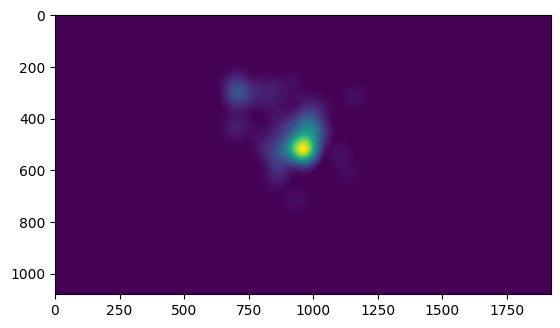

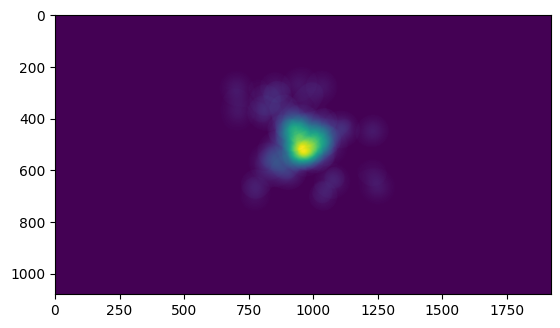

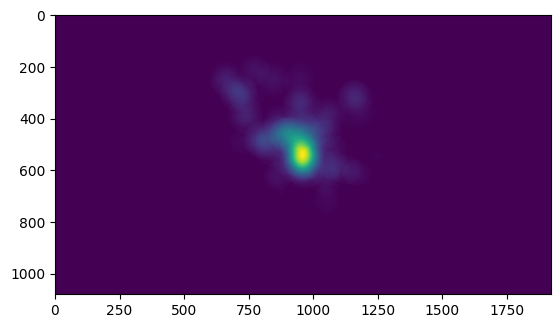

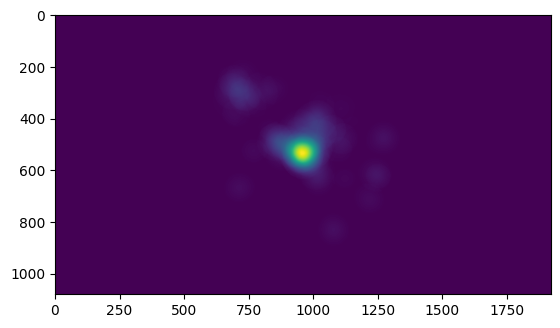

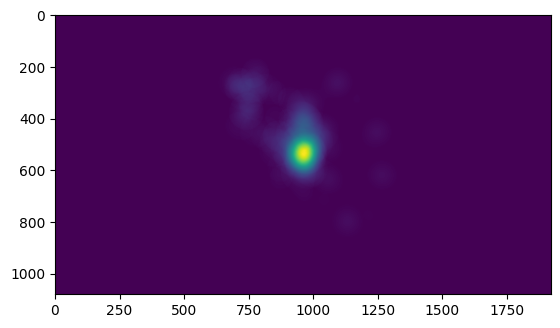

In [4]:
path = 'feature_analysis/location/case_task1_ss4_tn0_level1'
for stimuli in stimuli_list:
    imagemap = np.load(os.path.join(path, stimuli, 'heatmap.npy'))
    total_imagemap = np.zeros((1080,1920))
    for i in range(13):
        total_imagemap = np.add(total_imagemap, imagemap[:,:,i])
    grayscale_imagemap = minmaxscale_image(total_imagemap)
    plt.imshow(grayscale_imagemap)
    plt.show()

In [16]:
path = 'feature_analysis/location/case_task1_ss4_tn0_level2/brightness'

imagemap = np.load(os.path.join(path, 'heatmap.npy'))
for i in range(13):
    print(inv_participant[str(i+1)])
    plt.imshow(imagemap[:,:,i])
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'feature_analysis/location/case_task1_ss4_tn0_level2/brightness/heatmap.npy'

In [ ]:
stimuli = 'size'
heatmap = np.load(os.path.join(path, stimuli, 'heatmap.npy'))
for i in range(13):
    plt.imshow(heatmap[:,:,i], cmap='jet')
    plt.show()

In [5]:
for task, datapath in enumerate(['data/blue_rawdata_task1.csv', 'data/blue_rawdata_task2.csv']):
    myraw = LoadBlueRawData(datapath)
    participants_heatmaps_hit = np.zeros((1080,1920,13))
    participants_imagemaps_hit = np.zeros((1080,1920,13))
    participants_heatmaps_nohit = np.zeros((1080,1920,13))
    participants_imagemaps_nohit = np.zeros((1080,1920,13))
    data_indexlist = myraw.get_indexlist()
    for i in tqdm(data_indexlist):
        gaze_list = myraw.take_gaze(i)
        participant = myraw.take_participant(i)
        meta = myraw.take_meta(i)
        if myraw.take_hit_bool(i):
            participants_heatmaps_hit[:,:,participant-1] = draw_heatmap(gaze_list,participants_heatmaps_hit[:,:,participant-1])
            participants_imagemaps_hit[:,:,participant-1] = draw_imagemap(myraw.stimuli(i),participants_imagemaps_hit[:,:,participant-1])
        else:
            participants_heatmaps_nohit[:,:,participant-1] = draw_heatmap(gaze_list,participants_heatmaps_nohit[:,:,participant-1])
            participants_imagemaps_nohit[:,:,participant-1] = draw_imagemap(myraw.stimuli(i),participants_imagemaps_nohit[:,:,participant-1])
    
    np.save(f'feature_analysis/bool_hit/task{task+1}_heatmap_hit', participants_heatmaps_hit)
    np.save(f'feature_analysis/bool_hit/task{task+1}_heatmap_nohit', participants_heatmaps_nohit)
    np.save(f'feature_analysis/bool_hit/task{task+1}_imagemap_hit', participants_imagemaps_hit)
    np.save(f'feature_analysis/bool_hit/task{task+1}_imagemap_nohit', participants_imagemaps_nohit)

100%|██████████| 12993/12993 [33:58<00:00,  6.37it/s]


eunhye


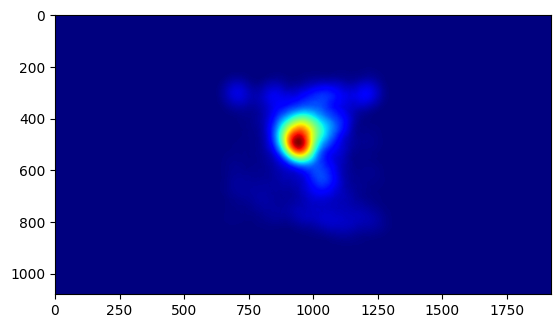

woojinkang


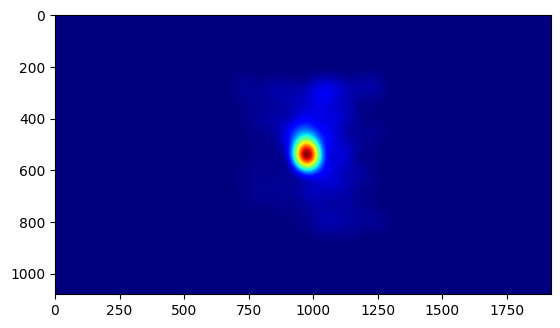

juchanseo


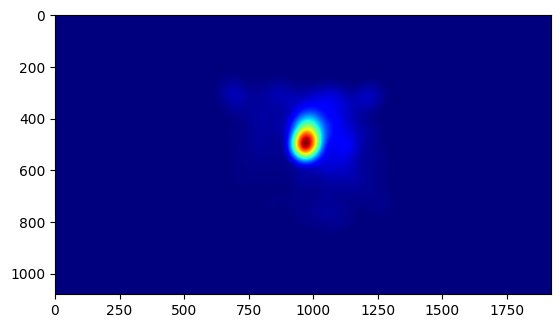

juyeon


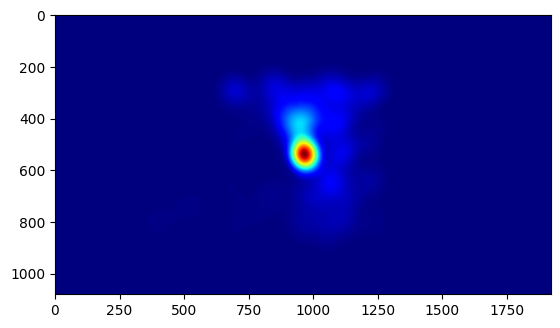

In-Taek


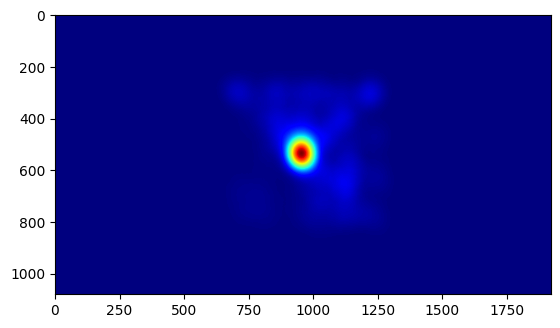

sooyeon


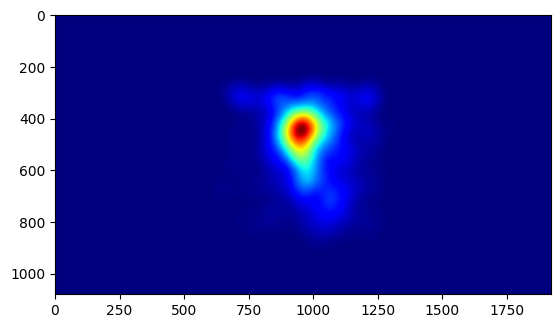

dongik


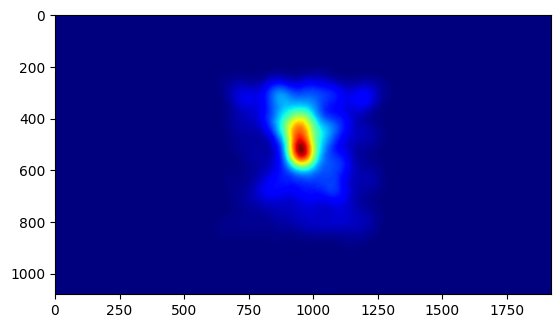

chungha


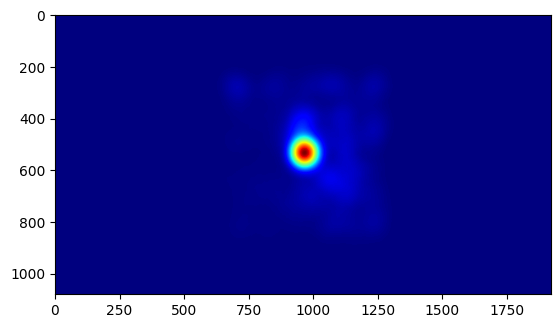

myounghun


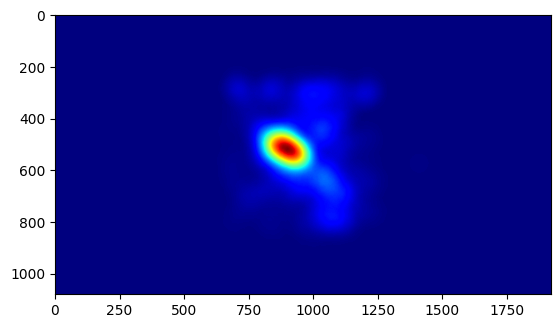

songmin


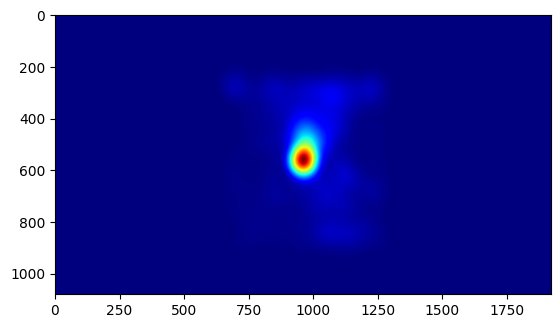

junryeol


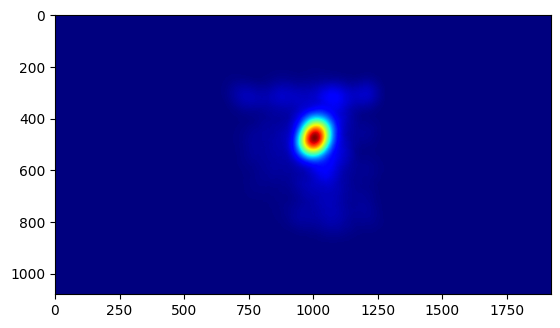

yeogyeong


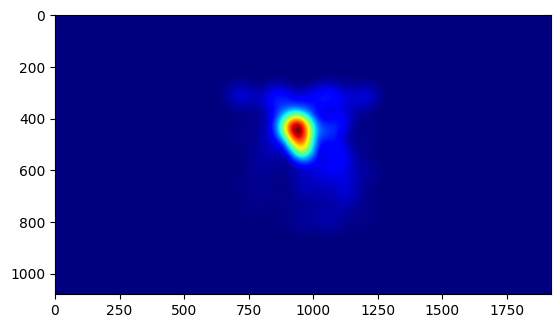

jooyeong


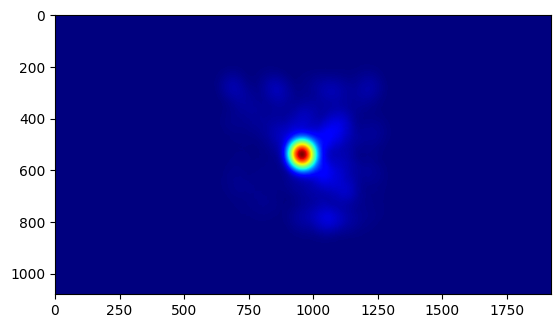

In [4]:
heatmap = np.load(os.path.join('feature_analysis', 'bool_hit', 'task2_heatmap_nohit.npy'))
participant_dict = {'chungha': '8', 'dongik': '7', 'eunhye': '1', 'In-Taek': '5', 'jooyeong': '13', 'juchanseo': '3', 'junryeol': '11', 
                    'juyeon': '4', 'myounghun': '9', 'songmin': '10', 'sooyeon': '6', 'woojinkang': '2', 'yeogyeong': '12'}
inv_participant = {v:k for k,v in participant_dict.items()}
for i in range(13):
    print(inv_participant[str(i+1)])
    plt.imshow(heatmap[:,:,i], cmap='jet')
    plt.show()